In [1]:
import re
import cv2 
import numpy as np
import pytesseract
from matplotlib import pyplot as plt

In [2]:
image = 'images/'

In [3]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def invert_grayscale(image):
    return cv2.bitwise_not(image)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#skew correction
def deskew(image):
    coordinates = np.column_stack(np.where(image > 0))
    ang=cv2.minAreaRect(coordinates)[-1]

    if ang<-45:

        ang=-(90+ang)

    else:

        ang=-ang

    height, width = image.shape[:2]

    center_img = (width / 2, height / 2)

    rotationMatrix = cv2.getRotationMatrix2D(center_img, ang, 1.0)

    image = cv2.warpAffine(image, rotationMatrix, (width, height), borderMode = cv2.BORDER_REFLECT)
    
    return image
    
#check blurry
def blurry(image):
    laplacian_var = cv2.Laplacian(image, cv2.CV_64F).var() 
    #return as value the average variance of the edges in an image. The higher the number, the sharper the edge is
    if laplacian_var < 50:
        print("Image blurry")
    return image
               
def fitall(image):
        blurry(image)
        remove_noise(image)
        image = get_grayscale(image)
        image = invert_grayscale(image)
        image = thresholding(image)
        image = deskew(image)
        return image

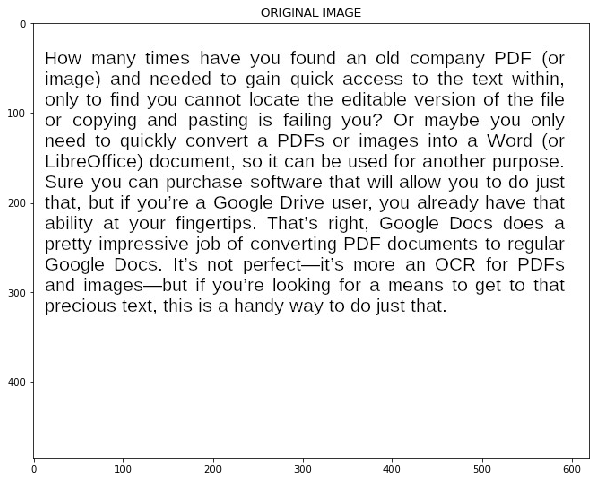

In [4]:
img = cv2.imread('test2.jpg')
b,g,r = cv2.split(img)
rgb_img = cv2.merge([r,g,b])

plt.figure(figsize=(12,8))
plt.imshow(rgb_img)
plt.title('ORIGINAL IMAGE')
plt.show()

In [5]:
img = fitall(img)

In [6]:
print('-----------------------------------------')
print('TESSERACT OUTPUT')
print('-----------------------------------------')
print(pytesseract.image_to_string(img))

-----------------------------------------
TESSERACT OUTPUT
-----------------------------------------
How many times have you found an old company PDF {or
image} and needed to gain quick access to the text within,
only to find you cannot locate the editable version of the file
or copying and pasting is failing you? Or maybe you only
need to quickly convert a PDFs or images into a Word {or
LibreOffice) document, so it can be used for another purpose.
Sure you can purchase software that will allow you to do just
that, but if you're a Google Drive user, you already have that
ability at your fingertips. That's right, Google Docs does a
pretty impressive job of converting PDF documents to regular
Google Docs. It's not perfect—it's more an OCR for PDFs
and images—but if you're looking for a means to get to that
precious text, this is a handy way to do just that.


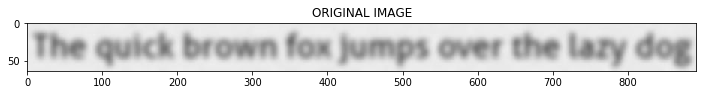

In [7]:
img1 = cv2.imread(image+'14.jpg')
b,g,r = cv2.split(img1)
rgb_img = cv2.merge([r,g,b])

plt.figure(figsize=(12,8))
plt.imshow(rgb_img)
plt.title('ORIGINAL IMAGE')
plt.show()

In [8]:
img1 = blurry(img1)
img1 = remove_noise(img1)
img1 = get_grayscale(img1)

Image blurry


In [9]:
print('-----------------------------------------')
print('TESSERACT OUTPUT')
print('-----------------------------------------')
print(pytesseract.image_to_string(img1))

-----------------------------------------
TESSERACT OUTPUT
-----------------------------------------
The quick brown fox jumps over the lazy dog


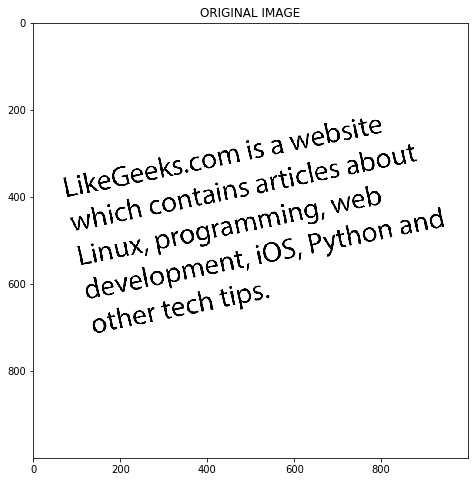

In [10]:
img2 = cv2.imread(image+'9.png')
b,g,r = cv2.split(img2)
rgb_img = cv2.merge([r,g,b])

plt.figure(figsize=(12,8))
plt.imshow(rgb_img)
plt.title('ORIGINAL IMAGE')
plt.show()

In [11]:
img2=fitall(img2)
print('-----------------------------------------')
print('TESSERACT OUTPUT')
print('-----------------------------------------')
print(pytesseract.image_to_string(img2))

-----------------------------------------
TESSERACT OUTPUT
-----------------------------------------
LikeGeeks.com is a website
which contains articles about
Linux, programming, web
development, iOS, Python and
other tech tips.


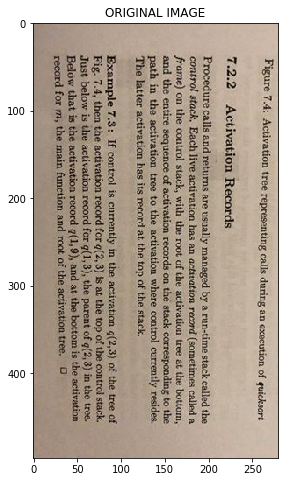

In [13]:
img3 = cv2.imread(image+'23.jpg')
b,g,r = cv2.split(img2)
rgb_img = cv2.merge([r,g,b])

plt.figure(figsize=(12,8))
plt.imshow(rgb_img)
plt.title('ORIGINAL IMAGE')
plt.show()

In [14]:
img3=fitall(img3)
print('-----------------------------------------')
print('TESSERACT OUTPUT')
print('-----------------------------------------')
print(pytesseract.image_to_string(img2))

-----------------------------------------
TESSERACT OUTPUT
-----------------------------------------
Figure 7.4: Activation tree representing calls during an execution of quicksort

7.2.2 Activation Records

Procedure alls and returns are usually managed by a run-time stack called the
‘control stack. Each live activation has an activation record (sometimes called a
frame) on the control stack, with the root of the activation tree at the bottom,
and the entire sequence of activation records on the stack corresponding to the
path in the activation tree to the activation where control currently resides.
‘The latter activation has its record at the top of the stack.
